In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [18]:
Train_data_set = tf.keras.utils.image_dataset_from_directory(
    "Train",
    
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=False,
)


Found 299 files belonging to 2 classes.


In [24]:
Test_data_set = tf.keras.utils.image_dataset_from_directory(
    "Test",
    
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=False,
)
Val_data_set = tf.keras.utils.image_dataset_from_directory(
    "Validation",
    
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=False,
)

Found 22 files belonging to 2 classes.
Found 62 files belonging to 2 classes.


In [20]:
class_names = Train_data_set.class_names
class_names

['Defective', 'Non defective']

In [16]:
print("length of the train data set", len(Train_data_set))
print("length of the test data set", len(Test_data_set))
print("length of the validation data set",len( Val_data_set))

length of the train data set 10
length of the test data set 1
length of the validation data set 2


In [17]:
for image_batch, label_batch in Train_data_set.take(1):
    print(image_batch[0].shape)
    print(label_batch.numpy())

(256, 256, 3)
[1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1]


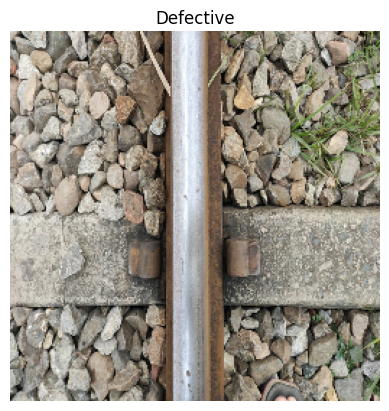

In [22]:
for image_batch, label_batch in Train_data_set.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(class_names[label_batch[1]])
    plt.axis("off")

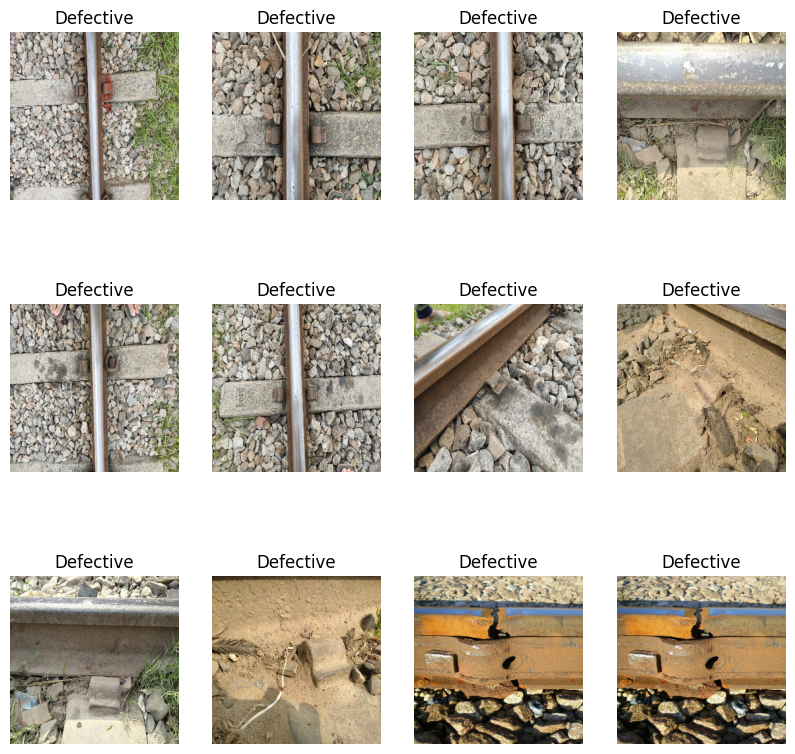

In [23]:
plt.figure(figsize=(10,10))
for image_batch, lable_batch in Train_data_set.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [25]:
Train_data_set = Train_data_set.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
Test_data_set  = Test_data_set .cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
Val_data_set = Val_data_set.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
#scalling we are deviding RGB values which are 0 - 255 into between 0 - 1

In [26]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

#DataAugmentation

In [28]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

#conv2D Layer

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [29]:
CHANNELS = 3
input_shape = (BATCH_SIZE , IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3 # we have 3 chategorial images in the data
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    # convolutional layer
    layers.Conv2D(32, (3,3),activation='relu',input_shape = input_shape), 
    
    # Pooling layers
    layers.MaxPooling2D((2,2)),
    
    
      # convolutional layer
    layers.Conv2D(64, kernel_size = (3,3),activation='relu'), 
    
    # Pooling layers
    layers.MaxPooling2D((2,2)),
    
          # convolutional layer
    layers.Conv2D(64, kernel_size = (3,3),activation='relu'), 
    
    # Pooling layers
    layers.MaxPooling2D((2,2)),
          # convolutional layer
    layers.Conv2D(64, (3,3),activation='relu'), 
    
    # Pooling layers
    layers.MaxPooling2D((2,2)),
          # convolutional layer
    layers.Conv2D(64, (3,3),activation='relu'), 
    
    # Pooling layers
    layers.MaxPooling2D((2,2)),
          # convolutional layer
    layers.Conv2D(64,  (3,3),activation='relu'), 
    
    # Pooling layers
    layers.MaxPooling2D((2,2)),
    #Flatten layers
    layers.Flatten(),
    # dense layer
    
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    
    
    
])


model.build(input_shape = input_shape)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [31]:
## Compiling optimizers

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
    )

# training the model

In [37]:
EPOCHS = 50


In [38]:
history = model.fit(
    Train_data_set,
    epochs = EPOCHS,
    verbose = 1,
    validation_data = Val_data_set
)

Epoch 1/50
10/10 [==============================] - 43s 4s/step - loss: 0.7071 - accuracy: 0.4047 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 37s 4s/step - loss: 0.7025 - accuracy: 0.4214 - val_loss: 0.6928 - val_accuracy: 0.5484
Epoch 3/50
10/10 [==============================] - 34s 4s/step - loss: 0.7216 - accuracy: 0.2241 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 31s 3s/step - loss: 0.7397 - accuracy: 0.4482 - val_loss: 0.7089 - val_accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 36s 4s/step - loss: 0.7169 - accuracy: 0.5017 - val_loss: 0.7092 - val_accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 35s 4s/step - loss: 0.7123 - accuracy: 0.5017 - val_loss: 0.6977 - val_accuracy: 0.5000
Epoch 7/50
10/10 [==============================] - 36s 4s/step - loss: 0.7350 - accuracy: 0.5017 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 8/50
10/10 [==

# vgg16

In [45]:
from keras import layers
import keras.backend as K
from keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from keras.layers import Input, Dense, Activation, Dropout

In [46]:
# include_top = False means that we doesnt include fully connected top layer we will add them accordingly
vgg16 = VGG16(include_top = False, input_shape = (256,256,3), weights = 'imagenet')

# training of all the convolution is set to false
for layer in vgg16.layers
    layer.trainable = False

x = GlobalAveragePooling2D()(vgg16.output)
predictions = Dense(1, activation='sigmoid')(x)

model_vgg = Model(inputs = vgg16.input, outputs = predictions)

In [50]:
model_vgg.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [51]:
history_vgg = model_vgg.fit(
      Train_data_set,
      validation_data=Val_data_set,
      epochs=30,
      verbose=2)

Epoch 1/30
10/10 - 182s - loss: 2.0169 - accuracy: 0.4582 - val_loss: 1.5119 - val_accuracy: 0.5645 - 182s/epoch - 18s/step
Epoch 2/30
10/10 - 172s - loss: 1.4971 - accuracy: 0.4883 - val_loss: 1.1781 - val_accuracy: 0.6290 - 172s/epoch - 17s/step
Epoch 3/30
10/10 - 156s - loss: 1.3917 - accuracy: 0.5284 - val_loss: 1.0031 - val_accuracy: 0.6290 - 156s/epoch - 16s/step
Epoch 4/30
10/10 - 157s - loss: 1.3159 - accuracy: 0.5518 - val_loss: 0.9542 - val_accuracy: 0.6129 - 157s/epoch - 16s/step
Epoch 5/30
10/10 - 184s - loss: 1.0994 - accuracy: 0.5886 - val_loss: 0.9319 - val_accuracy: 0.6452 - 184s/epoch - 18s/step
Epoch 6/30
10/10 - 172s - loss: 1.1956 - accuracy: 0.5652 - val_loss: 1.1461 - val_accuracy: 0.6129 - 172s/epoch - 17s/step
Epoch 7/30
10/10 - 173s - loss: 1.0401 - accuracy: 0.6020 - val_loss: 0.7147 - val_accuracy: 0.6774 - 173s/epoch - 17s/step
Epoch 8/30
10/10 - 184s - loss: 0.9407 - accuracy: 0.6522 - val_loss: 0.7055 - val_accuracy: 0.6774 - 184s/epoch - 18s/step
Epoch 9/

In [52]:
history_vgg

In [54]:
history_vgg.params

{'verbose': 2, 'epochs': 30, 'steps': 10}

In [55]:
history_vgg.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

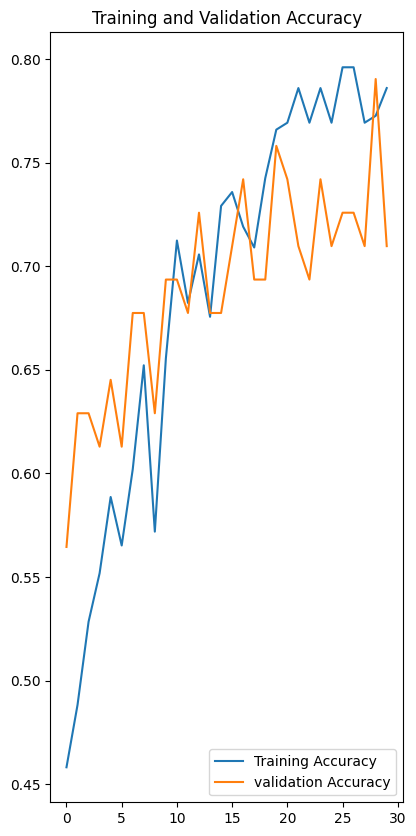

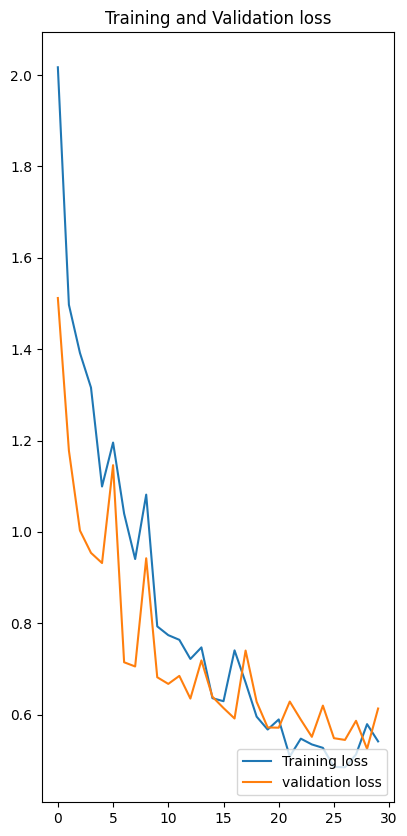

In [61]:
#accuracy chart
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(30), acc, label = 'Training Accuracy')
plt.plot(range(30), val_acc, label = 'validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#loss chart

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(30), loss, label = 'Training loss')
plt.plot(range(30), val_loss, label = 'validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')


In [62]:
for images_batch, labels_batch in Test_data_set.take(1):
    print(images_batch[0])

tf.Tensor(
[[[109.19336  114.19336  118.19336 ]
  [113.421875 117.140625 121.421875]
  [108.59473  107.9541   104.67285 ]
  ...
  [213.5625   214.5625   216.5625  ]
  [201.2207   202.50195  201.86133 ]
  [213.1748   211.7998   212.4873  ]]

 [[108.41504  115.31641  118.60449 ]
  [106.328125 110.328125 111.44336 ]
  [100.521484 100.521484  98.521484]
  ...
  [209.56934  210.56934  214.56934 ]
  [206.78613  208.78613  205.78613 ]
  [211.05371  209.39062  209.45312 ]]

 [[107.956055 109.956055 108.956055]
  [ 96.53125   98.53125   97.53125 ]
  [ 93.359375  93.359375  93.359375]
  ...
  [212.34863  213.34863  217.34863 ]
  [213.8125   214.8125   216.8125  ]
  [212.4082   211.0957   210.0332  ]]

 ...

 [[145.76172  132.76172  126.76172 ]
  [151.26465  138.26465  130.26465 ]
  [152.02539  139.02539  131.02539 ]
  ...
  [159.28125  166.28125  158.28125 ]
  [171.78711  177.78711  167.78711 ]
  [165.71875  173.65625  164.71875 ]]

 [[181.79492  163.87305  154.0293  ]
  [168.3916   149.54785  1

tf.Tensor(0, shape=(), dtype=int32)


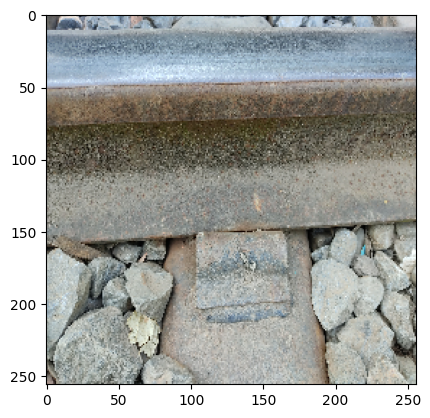

In [64]:
for images_batch, labels_batch in Test_data_set.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    print(labels_batch[0])

first image to predict
first image actual label: 0


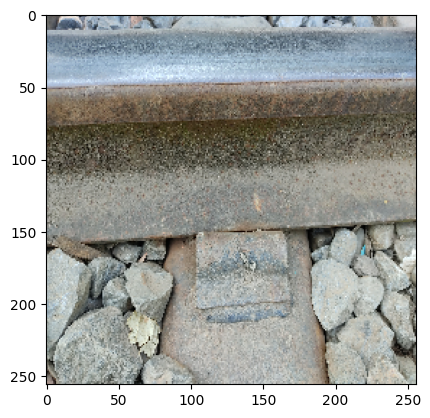

In [65]:
for images_batch, labels_batch in Test_data_set.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("first image actual label:", first_label)


first image to predict
first image actual label: Defective
1/1 [==============================] - 7s 7s/step
[0.00346322]


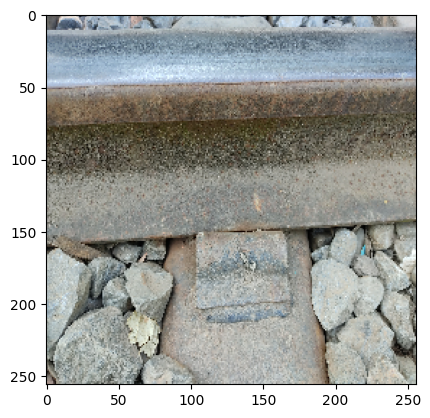

In [68]:
for images_batch, labels_batch in Test_data_set.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("first image actual label:", class_names[first_label])
## here we are predicting the image based on our prepared model

    batch_prediction = model_vgg.predict(images_batch)
    
    print(batch_prediction[0])

first image to predict
first image actual label: Defective
1/1 [==============================] - 10s 10s/step
predicted label_name: Defective


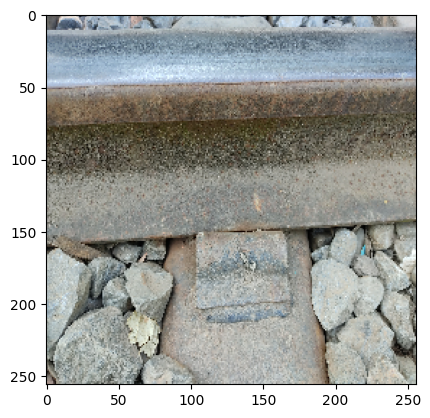

In [69]:
import numpy as np
for images_batch, labels_batch in Test_data_set.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("first image actual label:", class_names[first_label])
## here we are predicting the image based on our prepared model

    batch_prediction = model_vgg.predict(images_batch)
    
    print("predicted label_name:",class_names[np.argmax(batch_prediction[0])])

In [70]:
model_version = "VGG_Model"
model_vgg.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/VGG_Model\assets


INFO:tensorflow:Assets written to: ../models/VGG_Model\assets


# resnet50

In [72]:
from tensorflow.keras.applications import ResNet50

In [73]:
resnet50 = ResNet50(include_top = False, input_shape = (256,256,3), weights = 'imagenet')

# training of all the convolution is set to false
for layer in resnet50.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(resnet50.output)
predictions = Dense(1, activation='sigmoid')(x)

model_resnet50 = Model(inputs = resnet50.input, outputs = predictions)

94765736/94765736 [==============================] - 29s 0us/step


In [74]:
model_resnet50.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [75]:
history_resnet50 = model_resnet50.fit(
      Train_data_set,
      validation_data=Val_data_set,
      epochs=30,
      verbose=2)

Epoch 1/30
10/10 - 135s - loss: 0.9408 - accuracy: 0.3512 - val_loss: 0.8424 - val_accuracy: 0.5323 - 135s/epoch - 13s/step
Epoch 2/30
10/10 - 43s - loss: 0.7203 - accuracy: 0.5485 - val_loss: 0.7023 - val_accuracy: 0.5484 - 43s/epoch - 4s/step
Epoch 3/30
10/10 - 43s - loss: 0.6439 - accuracy: 0.6154 - val_loss: 0.5843 - val_accuracy: 0.6613 - 43s/epoch - 4s/step
Epoch 4/30
10/10 - 45s - loss: 0.6556 - accuracy: 0.6154 - val_loss: 0.5178 - val_accuracy: 0.7742 - 45s/epoch - 5s/step
Epoch 5/30
10/10 - 45s - loss: 0.6257 - accuracy: 0.6522 - val_loss: 0.4967 - val_accuracy: 0.7097 - 45s/epoch - 4s/step
Epoch 6/30
10/10 - 42s - loss: 0.4638 - accuracy: 0.7692 - val_loss: 0.4738 - val_accuracy: 0.8387 - 42s/epoch - 4s/step
Epoch 7/30
10/10 - 41s - loss: 0.5294 - accuracy: 0.7425 - val_loss: 0.4327 - val_accuracy: 0.8548 - 41s/epoch - 4s/step
Epoch 8/30
10/10 - 43s - loss: 0.5134 - accuracy: 0.7324 - val_loss: 0.4218 - val_accuracy: 0.8065 - 43s/epoch - 4s/step
Epoch 9/30
10/10 - 49s - loss

In [76]:
history_resnet50


In [77]:
history_resnet50.params

{'verbose': 2, 'epochs': 30, 'steps': 10}

In [79]:
history_resnet50.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [81]:
acc = history_resnet50.history['accuracy']
val_acc = history_resnet50.history['val_accuracy']

loss = history_resnet50.history['loss']
val_loss = history_resnet50.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

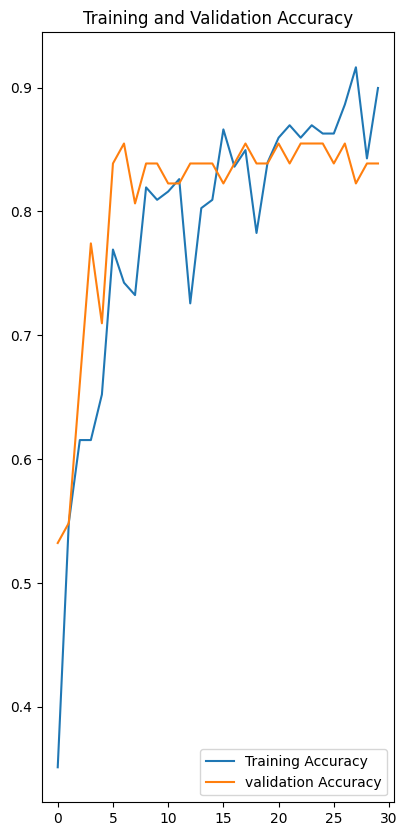

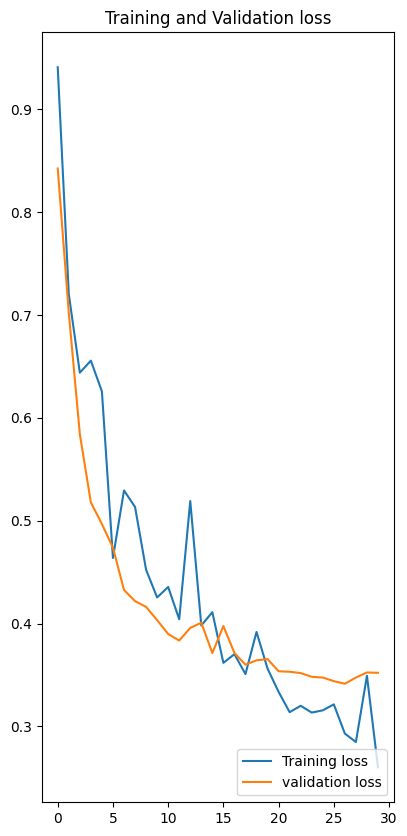

In [82]:
#accuracy chart
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(30), acc, label = 'Training Accuracy')
plt.plot(range(30), val_acc, label = 'validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#loss chart

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(30), loss, label = 'Training loss')
plt.plot(range(30), val_loss, label = 'validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')


In [83]:
for images_batch, labels_batch in Test_data_set.take(1):
    print(images_batch[0])

tf.Tensor(
[[[109.19336  114.19336  118.19336 ]
  [113.421875 117.140625 121.421875]
  [108.59473  107.9541   104.67285 ]
  ...
  [213.5625   214.5625   216.5625  ]
  [201.2207   202.50195  201.86133 ]
  [213.1748   211.7998   212.4873  ]]

 [[108.41504  115.31641  118.60449 ]
  [106.328125 110.328125 111.44336 ]
  [100.521484 100.521484  98.521484]
  ...
  [209.56934  210.56934  214.56934 ]
  [206.78613  208.78613  205.78613 ]
  [211.05371  209.39062  209.45312 ]]

 [[107.956055 109.956055 108.956055]
  [ 96.53125   98.53125   97.53125 ]
  [ 93.359375  93.359375  93.359375]
  ...
  [212.34863  213.34863  217.34863 ]
  [213.8125   214.8125   216.8125  ]
  [212.4082   211.0957   210.0332  ]]

 ...

 [[145.76172  132.76172  126.76172 ]
  [151.26465  138.26465  130.26465 ]
  [152.02539  139.02539  131.02539 ]
  ...
  [159.28125  166.28125  158.28125 ]
  [171.78711  177.78711  167.78711 ]
  [165.71875  173.65625  164.71875 ]]

 [[181.79492  163.87305  154.0293  ]
  [168.3916   149.54785  1

tf.Tensor(0, shape=(), dtype=int32)


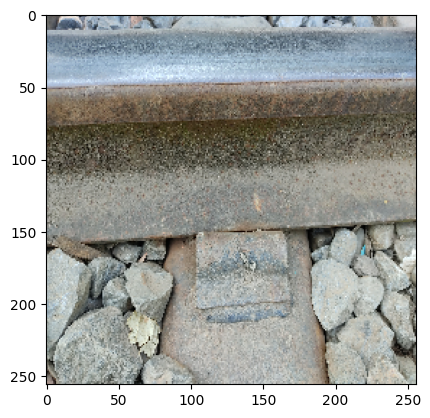

In [84]:
for images_batch, labels_batch in Test_data_set.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    print(labels_batch[0])

first image to predict
first image actual label: 0


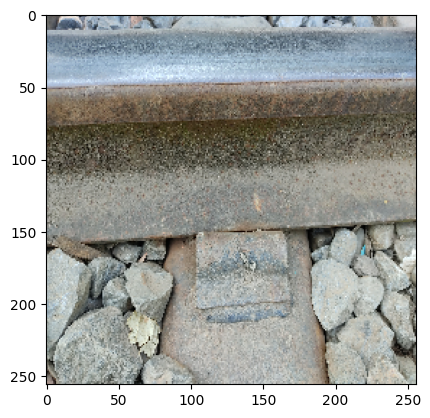

In [85]:
for images_batch, labels_batch in Test_data_set.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("first image actual label:", first_label)


first image to predict
first image actual label: Defective
1/1 [==============================] - 7s 7s/step
[0.51249117]


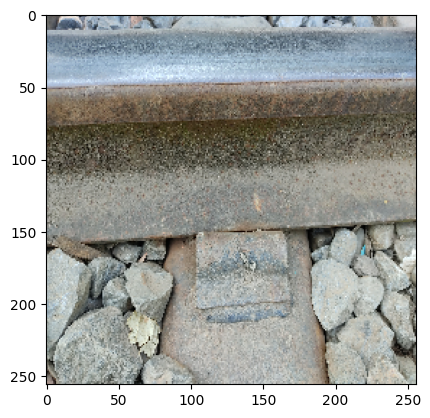

In [86]:
for images_batch, labels_batch in Test_data_set.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("first image actual label:", class_names[first_label])
## here we are predicting the image based on our prepared model

    batch_prediction = model_resnet50.predict(images_batch)
    
    print(batch_prediction[0])

first image to predict
first image actual label: Defective
1/1 [==============================] - 3s 3s/step
predicted label_name: Defective


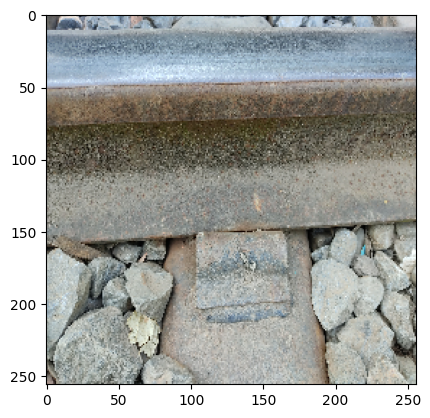

In [87]:
import numpy as np
for images_batch, labels_batch in Test_data_set.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("first image actual label:", class_names[first_label])
## here we are predicting the image based on our prepared model

    batch_prediction = model_resnet50.predict(images_batch)
    
    print("predicted label_name:",class_names[np.argmax(batch_prediction[0])])

In [88]:
model_version = "model_resnet50"
model_resnet50.save(f"../models/{model_version}")


INFO:tensorflow:Assets written to: ../models/model_resnet50\assets


INFO:tensorflow:Assets written to: ../models/model_resnet50\assets
